In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

In [3]:
# El Análisis exploratorio de datos solo lo haré del train para no sesgar el resultado:

data = pd.read_csv('../data/TRAIN_S4-KCCA.csv', parse_dates=['intake_date','outcome_date'])

### Recordatorio de entendiendo las features del notebook 02:

| Feature | Descripción | Tipo | Comentario |
| --- | --- | --- | --- |
| intake_date | Fecha de entrada del animal al refugio | obj - Numérica Discreta | FECHA - IMPORTA|
| animal_id | identificador del perro | obj - Numérica Continua | No interesa |
| intake_type | motivo de la recogida | obj - Categórica | MOTIVO - IMPORTA |
| intake_subtype | motivo del abandono | obj - Categórica | MOTIVO - IMPORTA |
| outcome_date | fecha de salida | obj - Numérica Discreta | FECHA - Descartar (información que no tendremos a furutos)|
| outcome_type | motivo de salida | obj - Categórica | MOTIVO - Descartar (información que no tendremos a furutos) |
| primary_breed | Raza primaria | obj - Categórica | = Breed? - IMPORTA |
| secondary_breed | Raza secundaria | obj - Categórica | IMPORTA |
| years_old | años de vida | int - Categórica  | IMPORTA |
| months_old | meses de vida | obj - Categórica | IMPORTA? - valorar modificar y unir a years_old|
| OutcomeGroup | tipo de salida del refugio | obj - Categórica | MOTIVO - Descartar (valorar para TARGET 2 categórico) |
| Breed | Raza oficial | obj - Categórica | = primary_breed? - Descartar |
| PitBullType | Es tipo PPP? | obj - Binaria | IMPORTA  |
| PitBullExpanded | Contiene algo de PPP? | obj - Binaria | IMPORTA  |
| AKC | Grupo del Kennel Club | obj - Categórica | Información repetida? - Descartar? |
| AKC_Extended | grupo del Kennel Club - Terriers separados | obj - Categórica | Información repetida? - Descartar? |
| KennelCardBreed | Etiqueta de la raza en la perrera | obj - Binaria | IMPORTANTE según estudio |
| LOS | Length of Stay | int - Numérica Discreta  | TARGET 1 |
| AgeGroup | Grupo de edad al que pertenece | obj - Categórica | Información repetida? - Descartar? |

In [95]:

# Columnas categóricas
col_cat = ['intake_type','intake_subtype','outcome_type','OutcomeGroup','PitBullType','PitBullExpanded','AKC','AKC_Extended','KennelCardBreed','AgeGroup']
col_breed = ['primary_breed','secondary_breed','Breed']

# Columnas numéricas
col_num = ['years_old','months_old']

# Columnas datetime
col_date = ['intake_date','outcome_date']

# Target numérico - PROBLEMA DE REGRESIÓN
target = ['LOS']

# Descarto animal_id ya que tiene casi el mismo valor que el indice.
exclude = ['animal_id']


### Visualización UNIVARIANTE

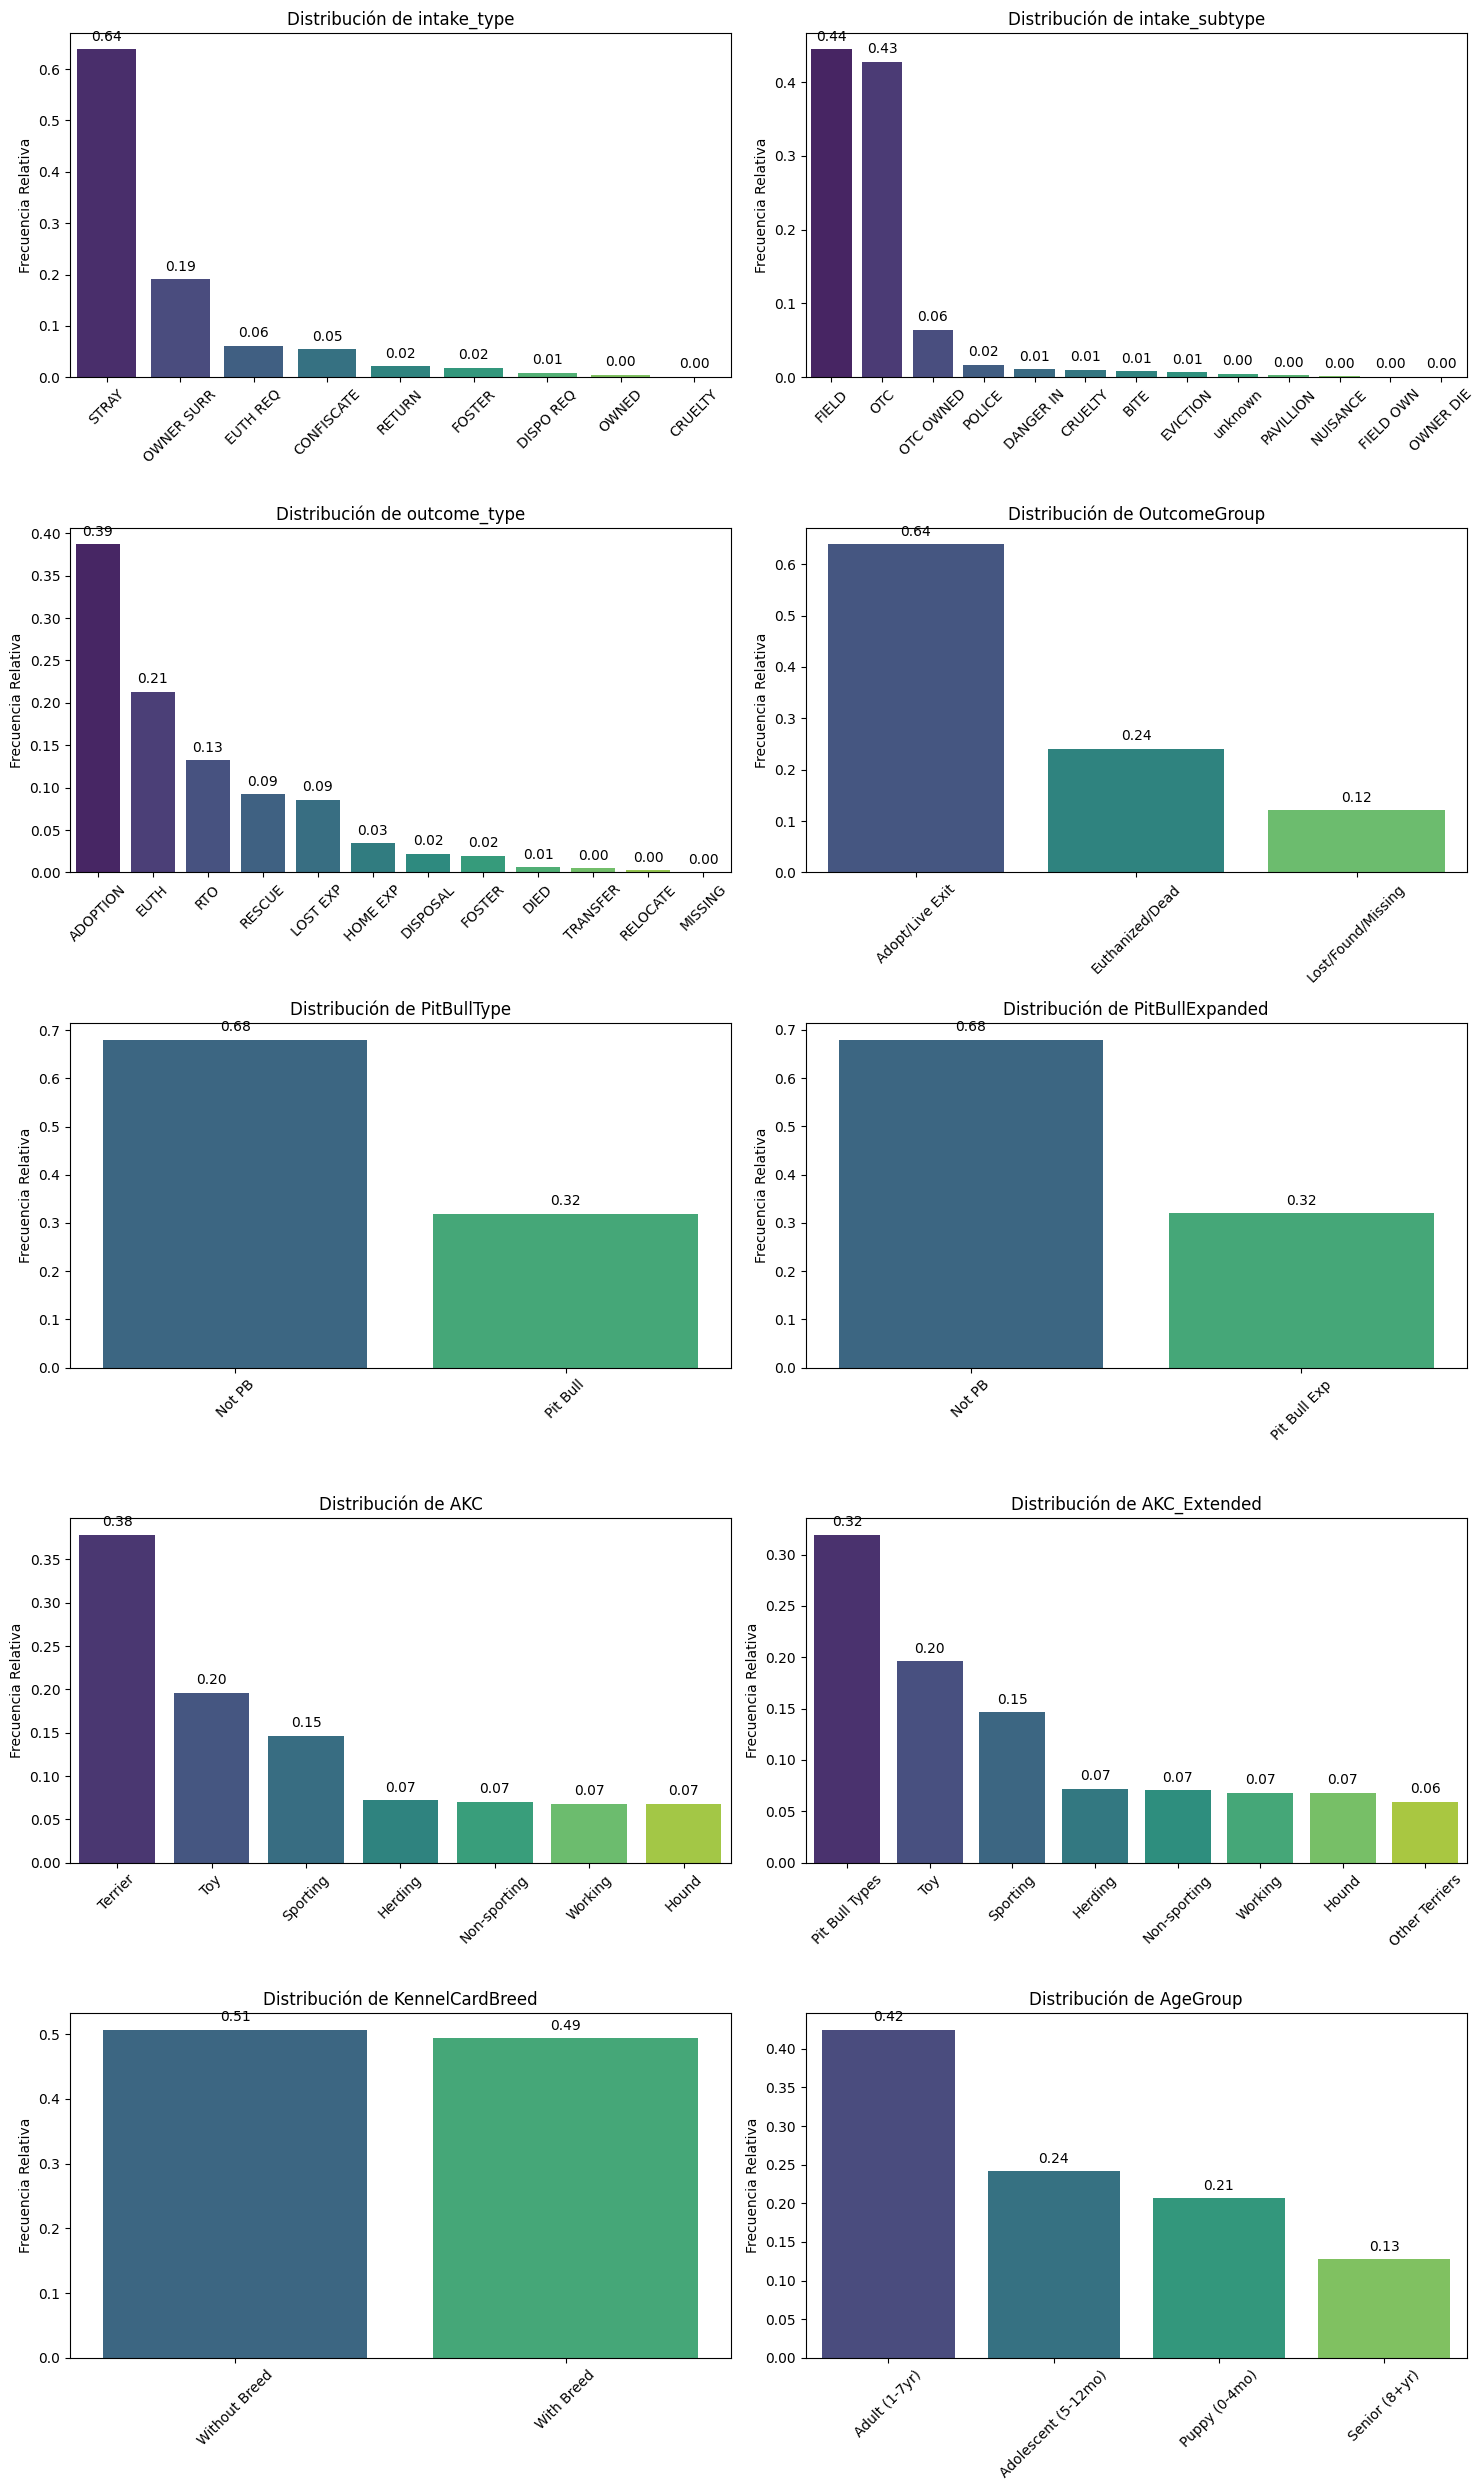

In [4]:
pinta_distribucion_categoricas(data,col_cat, relativa= True, mostrar_valores= True)

'intake_type': La mayoría de los perros ingresan bajo la categoría STAY, lo que podría indicar que muchos perros permanecen en el centro por un tiempo prolongado antes de ser adoptados o tener otro resultado.

'intake_subtype': La mayoría de los ingresos son categorizados bajo FIELD y OTC, indicando que muchos perros son encontrados en el campo o entregados directamente al centro.

'outcome_type': La adopción es la salida más común, lo cual es positivo para el bienestar animal. Sin embargo, la eutanasia aún representa una porción significativa.

'OutcomeGroup': La mayoría de los perros tienen un resultado positivo (Adoptive Exit), pero un número notable aún es eutanasiado o muerto.

'Tipo Pit Bull': Una cantidad considerable de perros es clasificada como Pit Bull, lo cual es relevante dado que el estudio se centra en estos perros y su percepción pública.

'AKC' y 'AKC_Extended': Las categorías más frecuentes son Terrier y Pit Bull Types, reflejando posiblemente la población predominante en el centro.

'KennelCardBreed': Existe una división casi igual entre perros con raza específica y aquellos sin raza definida, lo cual puede influir en la percepción y adopción.

'AgeGroup': La mayoría de los perros son adultos jóvenes, lo que podría afectar su tasa de adopción y estancia en el centro.

(2, 2)


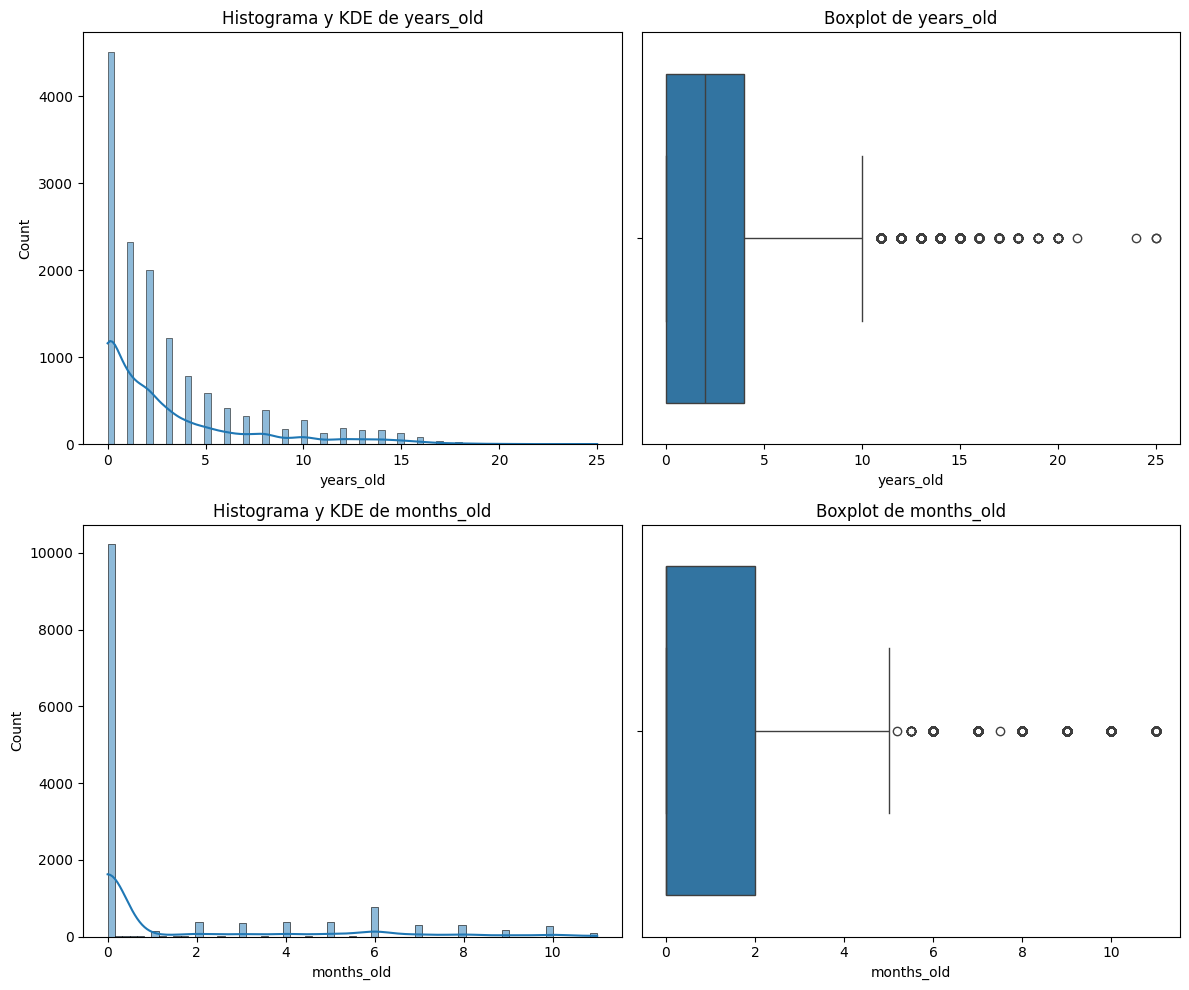

In [5]:
plot_combined_graphs(data,col_num)

'years_old': Los outliers en la distribución de years_old indican que, aunque la mayoría de los perros son jóvenes (menos de 5 años), hay una minoría significativa que es mucho mayor de edad. Estos perros mayores pueden enfrentar más desafíos para ser adoptados rápidamente.

'months_old': Similar a years_old, los outliers en months_old indican la presencia de cachorros que son relativamente mayores. Aunque menos común, estos cachorros más viejos podrían requerir estrategias de adopción diferentes.

In [19]:
intake_2014 = data[data['intake_date'].dt.year == 2014]
outcome_2014 = data[data['outcome_date'].dt.year == 2014]

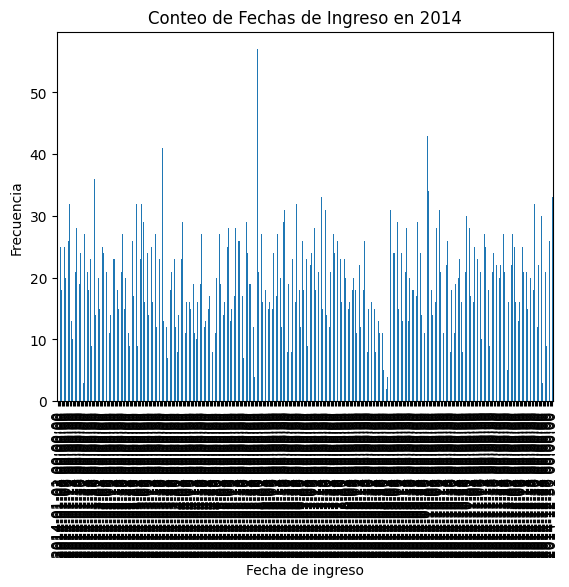

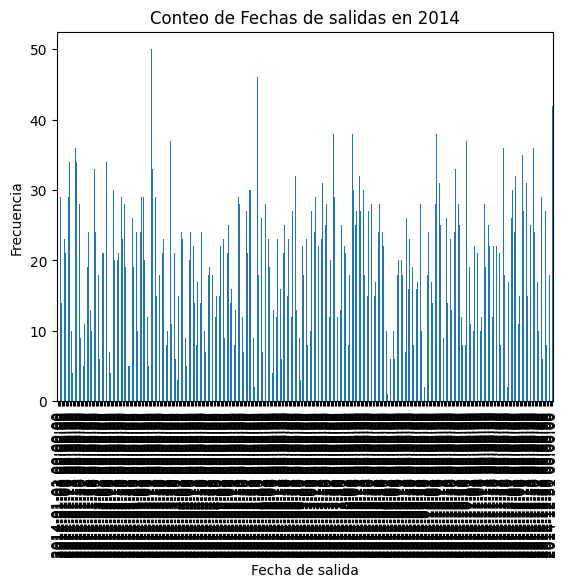

In [23]:
ingreso_2014_counts = intake_2014['intake_date'].value_counts().sort_index()
ingreso_2014_counts.plot(kind='bar')
plt.title('Conteo de Fechas de Ingreso en 2014')
plt.xlabel('Fecha de ingreso')
plt.ylabel('Frecuencia')
plt.show()

adopciones_2014_counts = outcome_2014['outcome_date'].value_counts().sort_index()
adopciones_2014_counts.plot(kind='bar')
plt.title('Conteo de Fechas de salidas en 2014')
plt.xlabel('Fecha de salida')
plt.ylabel('Frecuencia')
plt.show()

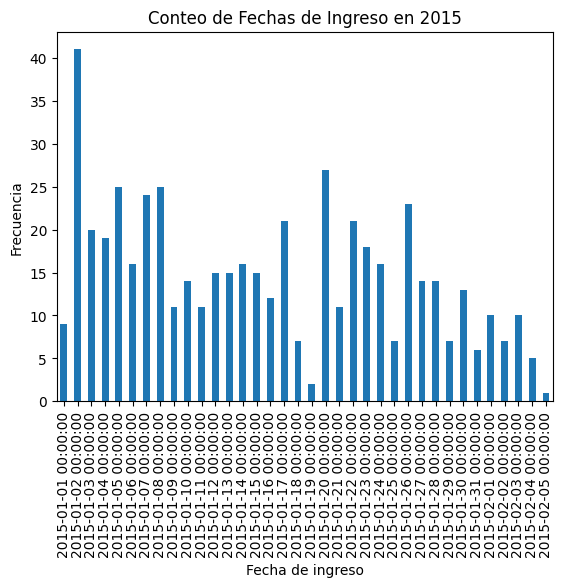

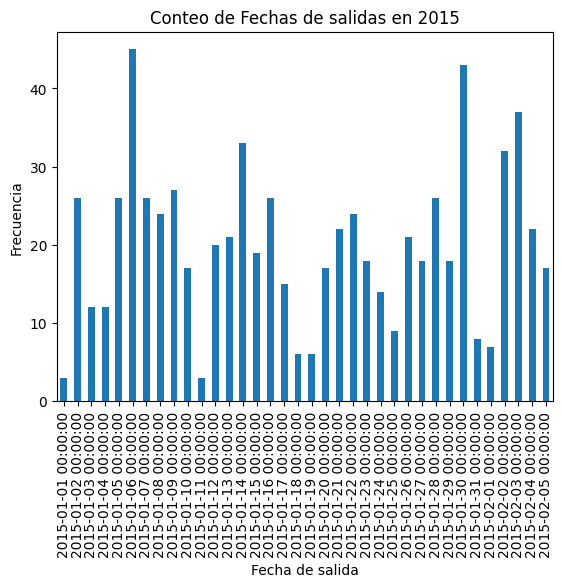

In [22]:
intake_2015 = data[data['intake_date'].dt.year == 2015]
outcome_2015 = data[data['outcome_date'].dt.year == 2015]

ingreso_2015_counts = intake_2015['intake_date'].value_counts().sort_index()
ingreso_2015_counts.plot(kind='bar')
plt.title('Conteo de Fechas de Ingreso en 2015')
plt.xlabel('Fecha de ingreso')
plt.ylabel('Frecuencia')
plt.show()

adopciones_2015_counts = outcome_2015['outcome_date'].value_counts().sort_index()
adopciones_2015_counts.plot(kind='bar')
plt.title('Conteo de Fechas de salidas en 2015')
plt.xlabel('Fecha de salida')
plt.ylabel('Frecuencia')
plt.show()

No se percibe estacionalidad ni en intake_date ni en outcome_date. 

In [24]:
data[col_breed]

,primary_breed,secondary_breed,Breed
0,SHIH TZU,unknown,Shih Tzu
1,BICHON FRISE,unknown,Bichon Frise
2,PIT BULL,MIX,American Staffordshire Terrier
3,AM PIT BULL TER,MIX,American Staffordshire Terrier
4,BORDER TERRIER,MIX,Border Terrier
...,...,...,...
13934,BOXER,unknown,Boxer
13935,PIT BULL,unknown,American Staffordshire Terrier
13936,GERM SHEPHERD,unknown,German Shepherd Dog
13937,AMER BULLDOG,MIX,American Staffordshire Terrier


In [27]:
data['Breed'].value_counts()[:10]

Breed
American Staffordshire Terrier    4421
Labrador Retreiver                1587
Chihuahua                         1169
German Shepherd Dog                644
Shih Tzu                           435
Boxer                              341
Yorkshire Terrier                  317
Beagle                             266
Dachshund                          257
Poodle                             236
Name: count, dtype: int64

In [28]:
data['primary_breed'].value_counts()[:10]

primary_breed
PIT BULL          3806
LABRADOR RETR     1587
CHIHUAHUA SH      1040
GERM SHEPHERD      644
SHIH TZU           435
BOXER              341
YORKSHIRE TERR     317
BEAGLE             266
POODLE MIN         217
JACK RUSS TERR     215
Name: count, dtype: int64

In [30]:
breed_10 = data['Breed'].value_counts()[:10]

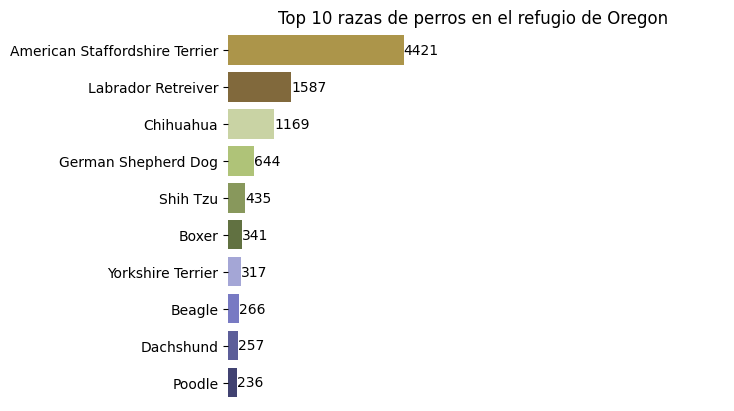

In [32]:
sns.barplot(y= breed_10.index, x= breed_10.values, hue= breed_10.values, legend=False, palette= "tab20b")
plt.title("Top 10 razas de perros en el refugio de Oregon ")
plt.ylabel("")
plt.xlabel("")
plt.grid(False)
plt.xlim(0,12500)
plt.xticks([])
sns.despine(left=True, bottom=True)

for i, valor in enumerate(breed_10):
    plt.text(valor, i, str(valor), ha='left', va='center')

Tal como nos indica el estudio, hay una numero significativo de Tipo PitBull 

In [51]:
target[0]

'LOS'

<Axes: xlabel='LOS', ylabel='Count'>

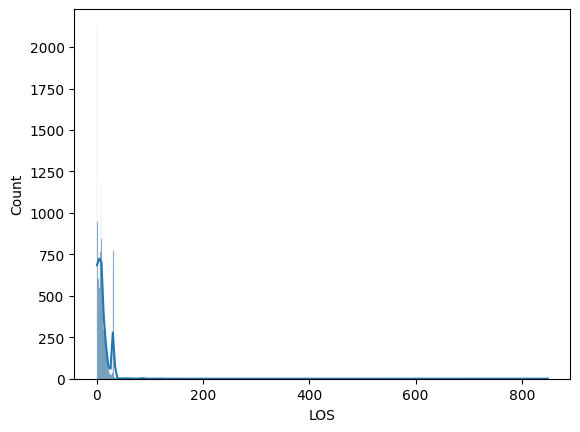

In [55]:
sns.histplot(x = target[0], data = data, kde = True)

(0.0, 50.0)

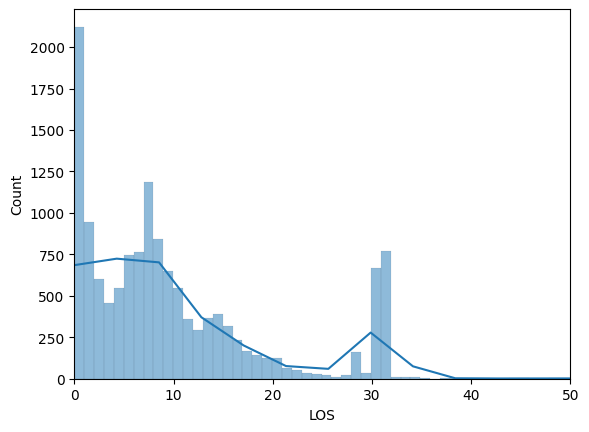

In [54]:
sns.histplot(x = target[0], data = data, kde = True)
plt.xlim(0, 50)

### Visualización Bivariante
#### Features numéricas:

In [77]:
# Selecciono la porcion de target que mas datos tiene sin contar la cola larga para mejorar su visualización
target_visual = data[data['LOS'] <= 40]

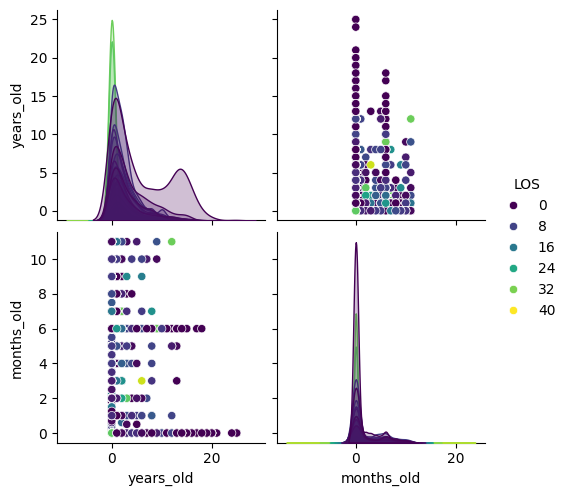

In [75]:
sns.pairplot(target_visual[col_num + target], hue='LOS', palette='viridis')

In [104]:
# Voy a crear una nueva columna fusionando years y months:

def calculate_age(years, months):
    return round(years + months / 12,1)

data['age'] = data.apply(lambda row: calculate_age(row['years_old'], row['months_old']), axis=1)


In [96]:
col_num.append('age')

In [105]:
target_visual = data[data['LOS'] <= 40]

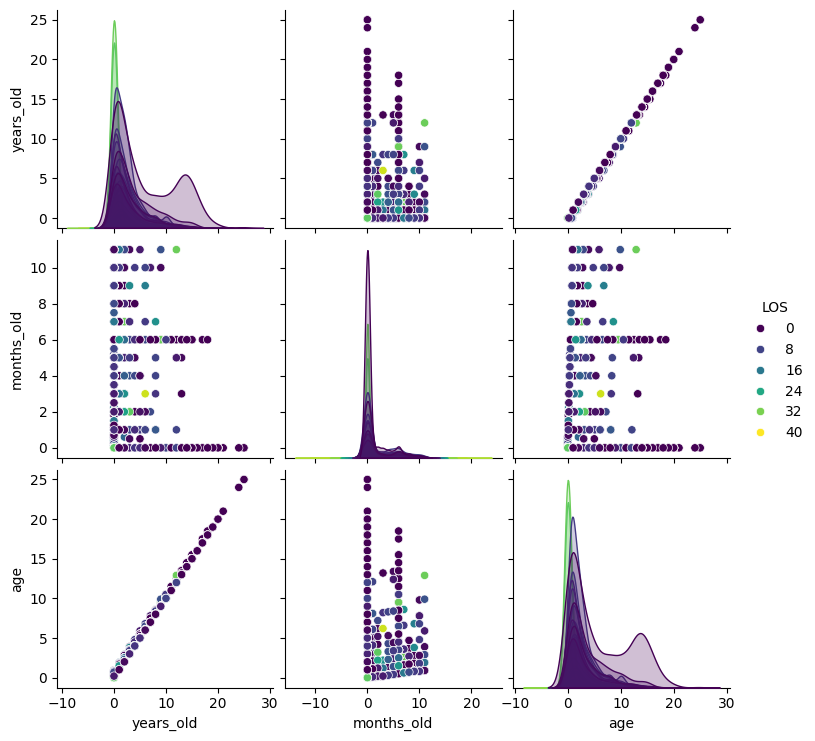

In [107]:
target_visual = data[data['LOS'] <= 40]
sns.pairplot(target_visual[col_num + target], hue='LOS', palette='viridis')

Visualmente se aporta la misma información years_old que age, así que preferentemente me quedaré con la nueva columna creada.

#### Features categóricas: 

In [113]:
col_cat

['intake_type',
 'intake_subtype',
 'outcome_type',
 'OutcomeGroup',
 'PitBullType',
 'PitBullExpanded',
 'AKC',
 'AKC_Extended',
 'KennelCardBreed',
 'AgeGroup']

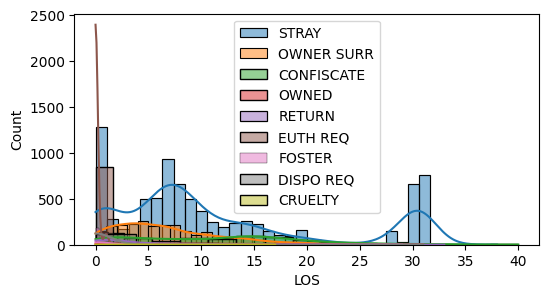

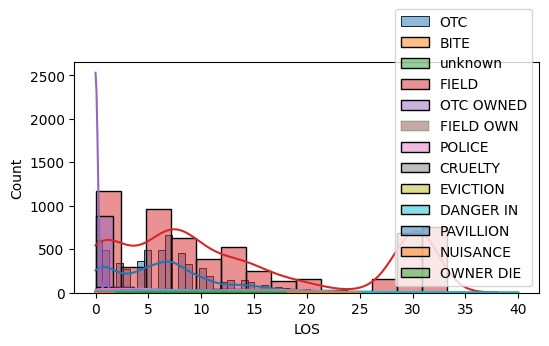

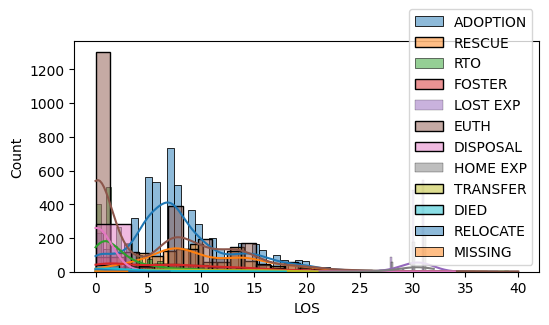

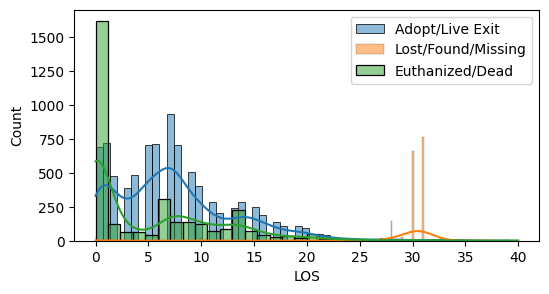

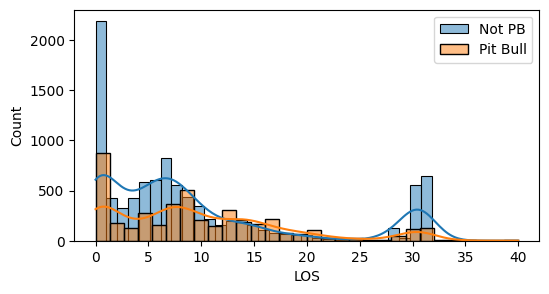

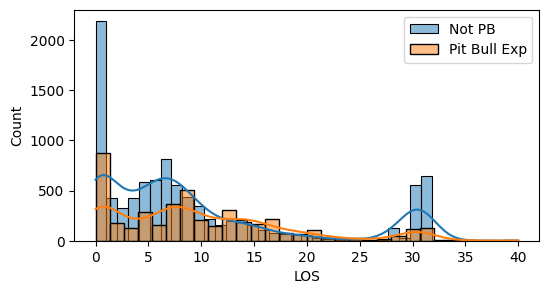

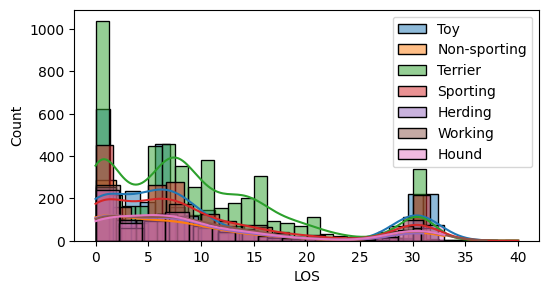

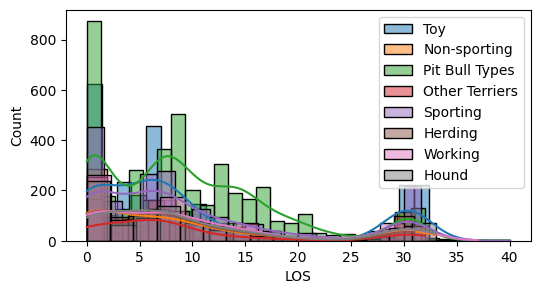

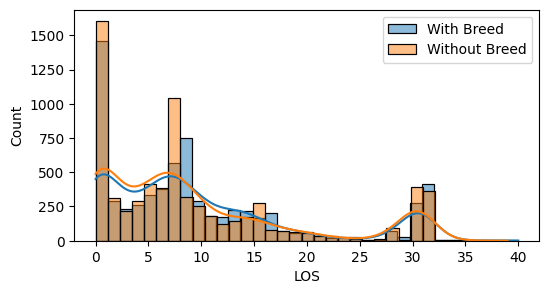

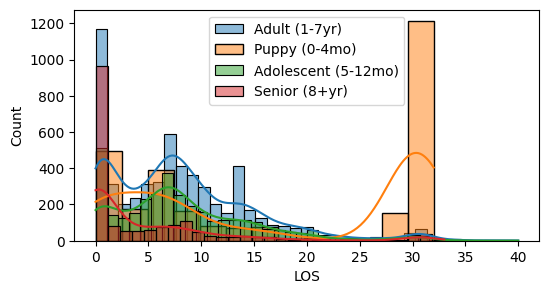

In [115]:
for categorica in col_cat:

    variable_numerica = "LOS"

    plt.figure(figsize=(6,3))
    for valor in target_visual[categorica].unique():  
        sns.histplot(target_visual.loc[target_visual[categorica] == valor,variable_numerica], kde= True, label=valor)
    plt.legend();